# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
location_data = pd.DataFrame()
location_data['lat_values'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['lng_values'] = [np.random.uniform(-180, 180) for x in range(1500)]

location_data.head()

,lat_values,lng_values
0,-18.847813,-10.284239
1,-65.116875,24.379012
2,28.029028,164.069227
3,-14.330292,-108.260154
4,-3.612354,-6.616344


In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
##Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
wkey = "e5df3084646467abc6983011d86e5360"
appid = wkey
settings = {"units": "imperial", "appid": wkey}
url = f"{url}appid={wkey}&units={units}"

In [12]:
url


'http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial'

In [13]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Esperance
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=esperance
Processing Record 2 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=ushuaia
Processing Record 3 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=arraial do cabo
Processing Record 4 | Ürümqi
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=urumqi
Processing Record 5 | Vaini
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=vaini
Processing Record 6 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=olafsvik
Processing Record 7 | Shimoda
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 58 | Banda Aceh
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=banda aceh
Processing Record 59 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=port alfred
Processing Record 60 | Viranşehir
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=viransehir
Processing Record 61 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=guerrero negro
Processing Record 62 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=kavaratti
Processing Record 63 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=port elizabeth
Processing Record 64 | Pribinić
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646

City not found. Skipping...
Processing Record 113 | East London
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=east london
Processing Record 114 | Barrow
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=barrow
Processing Record 115 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=petropavlovsk-kamchatskiy
Processing Record 116 | Praia
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=praia
Processing Record 117 | Djibouti
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=jibuti
Processing Record 118 | Beloha
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=beloha
Processing Record 119 | Bluff
http://api.openweathermap.org/data/2.5/weather?a

Processing Record 168 | Mehamn
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=mehamn
Processing Record 169 | Antalaha
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=antalaha
Processing Record 170 | Airai
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=airai
Processing Record 171 | Vanimo
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=vanimo
Processing Record 172 | Acapulco de Juárez
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=acapulco
Processing Record 173 | Nokaneng
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=nokaneng
Processing Record 174 | Marshfield
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperia

Processing Record 225 | Emba
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=emba
Processing Record 226 | Bubaque
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=bubaque
Processing Record 227 | Huaihua
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=huaihua
Processing Record 228 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=srednekolymsk
Processing Record 229 | Pekan
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=pekan
Processing Record 230 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=ponta do sol
Processing Record 231 | Chittarkonda
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=i

Processing Record 281 | San Jerónimo
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=san jeronimo
Processing Record 282 | Bara
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=bara
Processing Record 283 | Buta
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=buta
Processing Record 284 | Nizhniy Kuranakh
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=nizhniy kuranakh
Processing Record 285 | Omboué
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=omboue
Processing Record 286 | Ongandjera
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=ongandjera
Processing Record 287 | Korla
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=

Processing Record 337 | Nishihara
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=nishihara
Processing Record 338 | Zhicheng
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=zhicheng
Processing Record 339 | Marrakesh
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=marrakesh
Processing Record 340 | Souillac
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=souillac
Processing Record 341 | Ngaoundéré
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=ngaoundere
City not found. Skipping...
Processing Record 342 | Vardø
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=vardo
Processing Record 343 | Majene
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467ab

Processing Record 393 | Abū Zabad
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=abu zabad
Processing Record 394 | Karaton
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=karaton
Processing Record 395 | Arrondissement de Mende
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=mende
Processing Record 396 | Baykit
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=baykit
Processing Record 397 | Druzhba
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=druzhba
Processing Record 398 | Ust-Kuyga
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=ust-kuyga
Processing Record 399 | Arona
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=

Processing Record 449 | Narón
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=naron
Processing Record 450 | Bulungu
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=bulungu
Processing Record 451 | Tefé
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=tefe
Processing Record 452 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=half moon bay
City not found. Skipping...
City not found. Skipping...
Processing Record 453 | De-Kastri
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=de-kastri
Processing Record 454 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=broken hill
Processing Record 455 | Abhā
http://api.openweathermap.org/data/2.5/weat

Processing Record 505 | Lázaro Cárdenas
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=lazaro cardenas
Processing Record 506 | Goundi
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=goundi
Processing Record 507 | Iralaya
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=iralaya
Processing Record 508 | Ilebo
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=ilebo
Processing Record 509 | Kerema
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=kerema
Processing Record 510 | Altay
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=altay
Processing Record 511 | Bacolod City
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&

City not found. Skipping...
Processing Record 561 | Ploemeur
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=ploemeur
Processing Record 562 | Kuril'sk
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=kurilsk
Processing Record 563 | Huánuco
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=huanuco
Processing Record 564 | Usinsk
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=usinsk
City not found. Skipping...
Processing Record 565 | Kahului
http://api.openweathermap.org/data/2.5/weather?appid=e5df3084646467abc6983011d86e5360&units=imperial&q=kahului


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Create DataFrame
weather_df = pd.DataFrame({"City": city_name})

weather_df["Country"] = country
weather_df["Date"] = date      
weather_df["Latitude"] = lat
weather_df["Longitude"] = lng
weather_df["Cloudiness (%)"] = cloudiness
weather_df["Humidity (%)"] = humidity
weather_df["Max Temp (F)"] = max_temp
weather_df["Wind Speed (mph)"] = wind_speed


In [25]:
# Display data frame head 
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Esperance,AU,1599700816,-33.87,121.90,99,72,64.40,20.80
1,Ushuaia,AR,1599700785,-54.80,-68.30,75,52,42.80,13.87
2,Arraial do Cabo,BR,1599700828,-22.97,-42.03,20,88,73.40,12.75
3,Ürümqi,CN,1599700829,43.80,87.60,98,58,59.00,4.47
4,Vaini,TO,1599700840,-21.20,-175.20,99,86,76.19,31.21


In [26]:
# Data Count
weather_df.count()

City                565
Country             565
Date                565
Latitude            565
Longitude           565
Cloudiness (%)      565
Humidity (%)        565
Max Temp (F)        565
Wind Speed (mph)    565
dtype: int64

In [27]:
# Convert data strings to float
#pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
#pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
#pd.to_numeric(weather_df["Latitude"]).astype(float)
#pd.to_numeric(weather_df["Longitude"]).astype(float)
#pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
#pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
#weather_df

#Export DataFrame to CSV File
weather_df.to_csv(r'weather_df.csv', index=False)



In [28]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Esperance,AU,1599700816,-33.87,121.90,99,72,64.40,20.80
1,Ushuaia,AR,1599700785,-54.80,-68.30,75,52,42.80,13.87
2,Arraial do Cabo,BR,1599700828,-22.97,-42.03,20,88,73.40,12.75
3,Ürümqi,CN,1599700829,43.80,87.60,98,58,59.00,4.47
4,Vaini,TO,1599700840,-21.20,-175.20,99,86,76.19,31.21


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

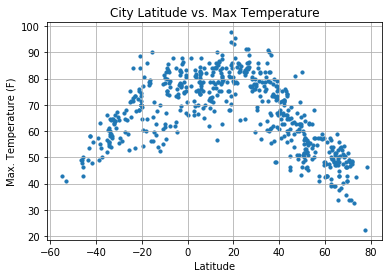

The plot shows that as we further away from the equator, temperature decreases


In [32]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Max Temp (F)"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
print("The plot shows that as we further away from the equator, temperature decreases")

## Latitude vs. Humidity Plot

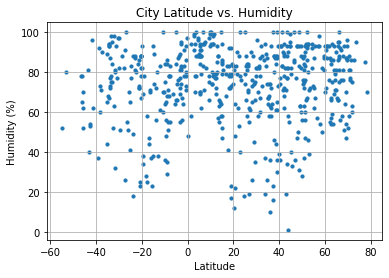

In [35]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()


## Latitude vs. Cloudiness Plot

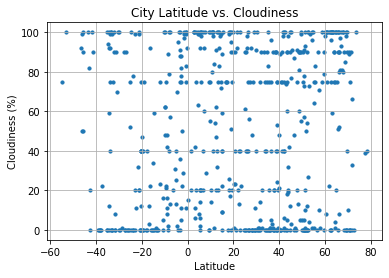

In [36]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

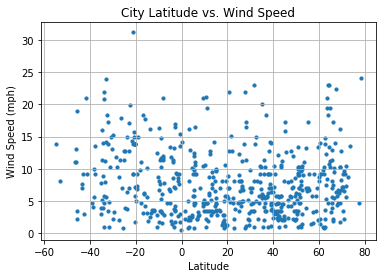

In [37]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

## Linear Regression

In [38]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [41]:
northlat_df = weather_df.loc[weather_df["Latitude"] >= 0,:]
southlat_df = weather_df.loc[weather_df["Latitude"] < 0,:]

northlat_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
3,Ürümqi,CN,1599700829,43.80,87.60,98,58,59.00,4.47
5,Olafsvik,IS,1599700841,64.89,-23.71,100,90,47.12,19.44
6,Shimoda,JP,1599700843,34.67,138.95,75,74,86.00,10.29
7,Thompson,CA,1599700844,55.74,-97.86,75,67,57.20,9.17
8,Bereda,ES,1599700845,43.27,-7.54,60,100,60.01,4.00


#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8068641865300188


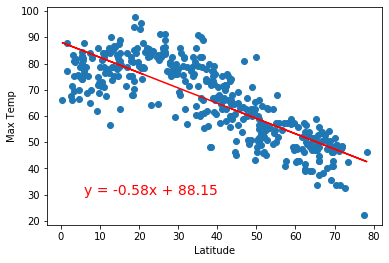

In [45]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp (F)"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7253082380357888


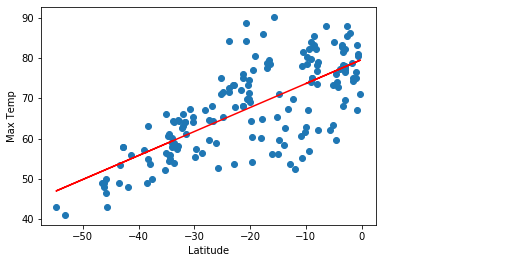

In [46]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp (F)"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.02960198805418509


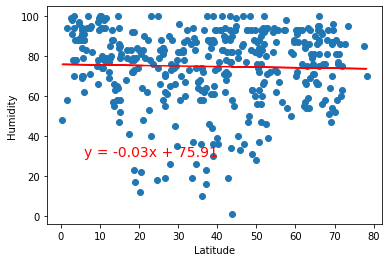

In [48]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity (%)"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.031738933603553024


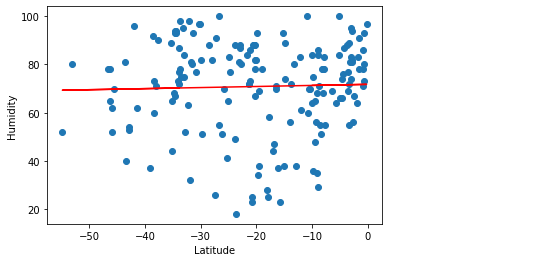

In [49]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity (%)"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04063929743242497


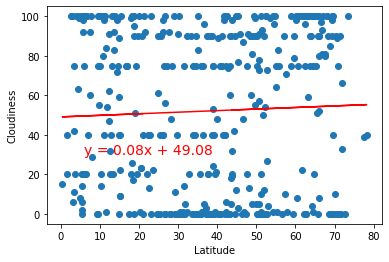

In [51]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness (%)"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.020652711772281285


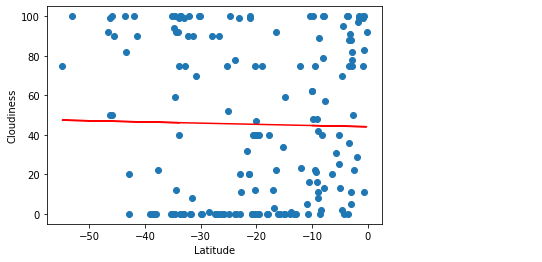

In [52]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness (%)"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13629789548788623


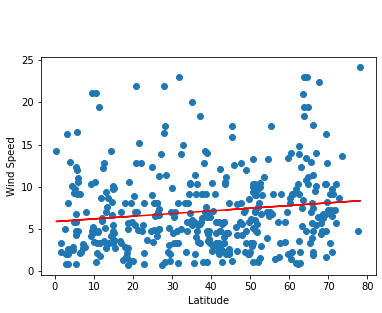

In [57]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed (mph)"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1725207803967133


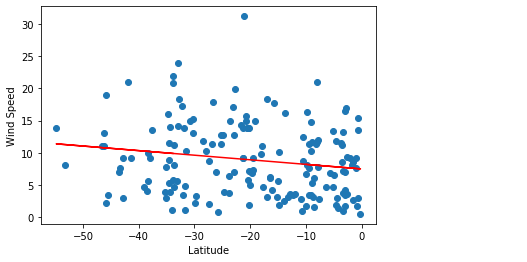

In [58]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed (mph)"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))